### Importing necessary libraries.

In [1]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data.

In [2]:
df = pd.read_csv("E:/CSVs/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Chech if any and null & duplicated values present.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Data Visulization 

<Axes: xlabel='Outcome', ylabel='count'>

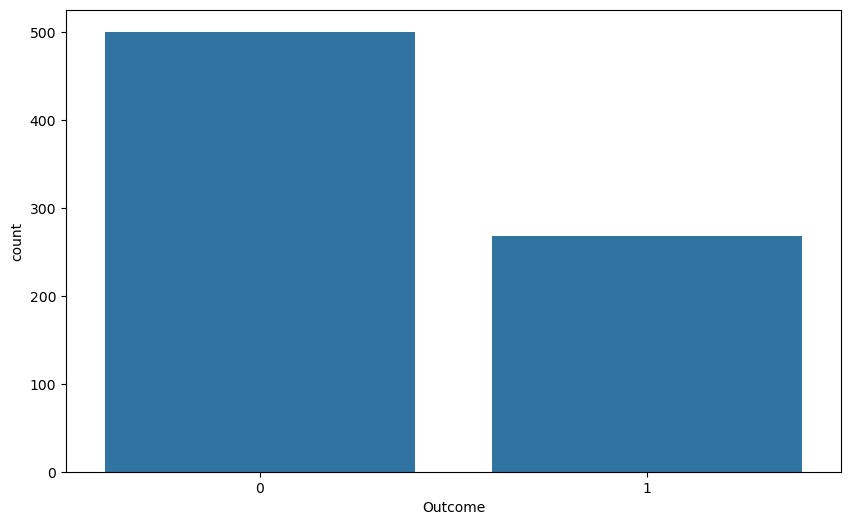

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x= "Outcome", data = df)



In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Finding outliers.

In [8]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get only the outlier values from that column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers


In [9]:
for col in df.columns:
    if col != 'Outcome':
        outliers = detect_outliers_iqr(df, col)
        print(f"\n Outliers in '{col}' ({len(outliers)} found):")
        print(outliers.head())  # just preview first 5



 Outliers in 'Pregnancies' (4 found):
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

 Outliers in 'Glucose' (5 found):
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

 Outliers in 'BloodPressure' (45 found):
7       0
15      0
18     30
43    110
49      0
Name: BloodPressure, dtype: int64

 Outliers in 'SkinThickness' (1 found):
579    99
Name: SkinThickness, dtype: int64

 Outliers in 'Insulin' (34 found):
8      543
13     846
54     342
111    495
139    325
Name: Insulin, dtype: int64

 Outliers in 'BMI' (19 found):
9       0.0
49      0.0
60      0.0
81      0.0
120    53.2
Name: BMI, dtype: float64

 Outliers in 'DiabetesPedigreeFunction' (29 found):
4     2.288
12    1.441
39    1.390
45    1.893
58    1.781
Name: DiabetesPedigreeFunction, dtype: float64

 Outliers in 'Age' (9 found):
123    69
363    67
453    72
459    81
489    67
Name: Age, dtype: int64


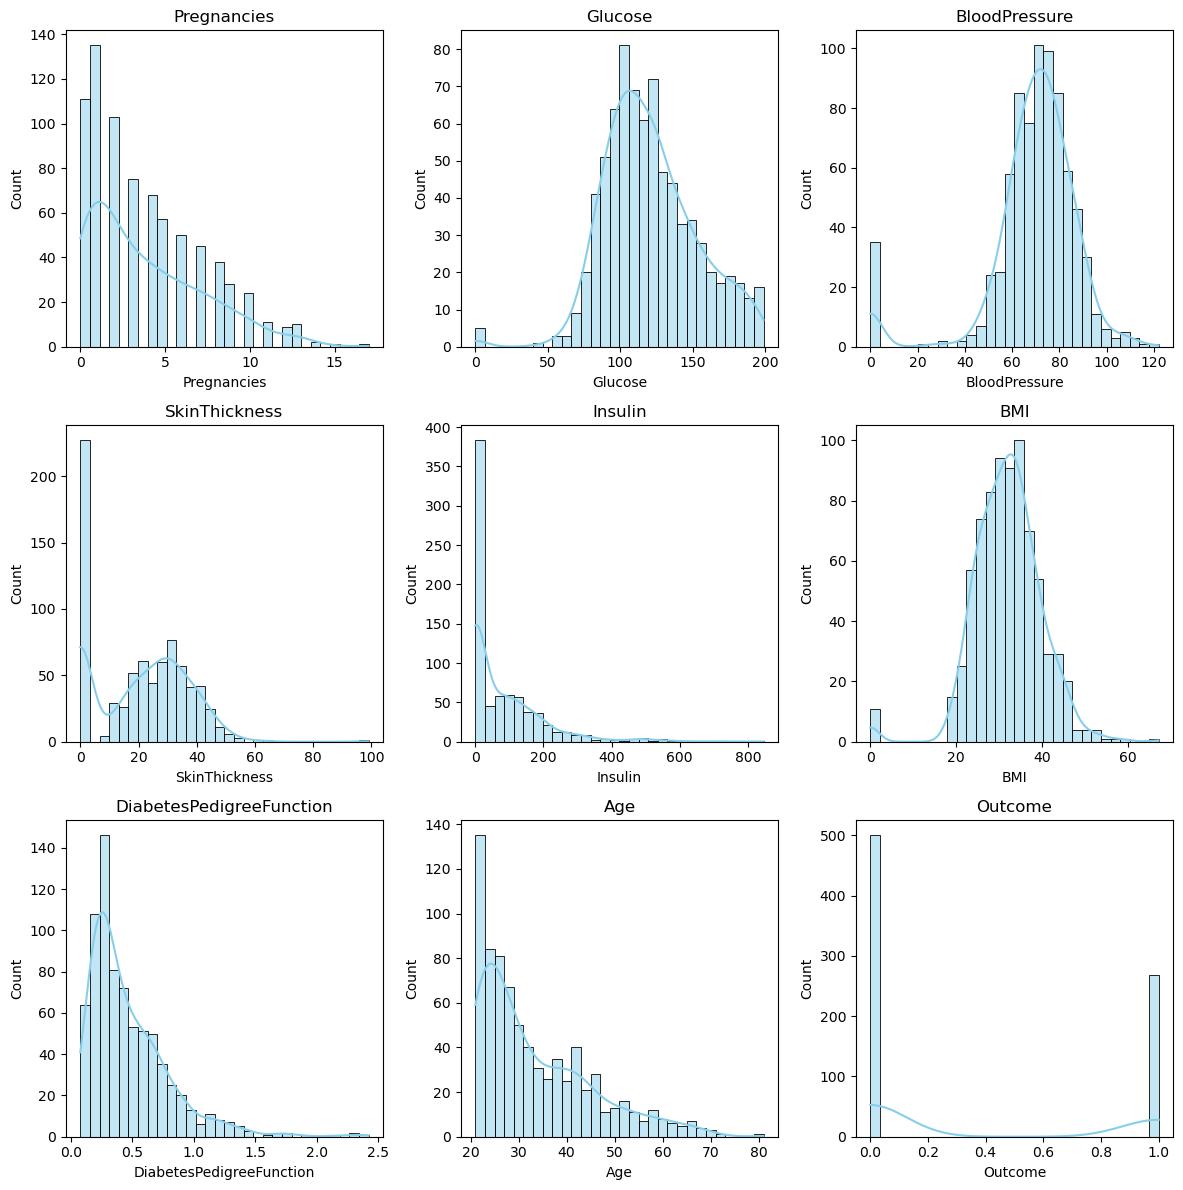

In [10]:
plt.figure(figsize=(12, 12))
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


### Standard scaling and Label encoading.

In [11]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

# First transform the data (excluding the "Outcome" column)
scaled_values = sc_x.fit_transform(df.drop(["Outcome"], axis=1))

# Then convert it back to a DataFrame with the correct column names
x = pd.DataFrame(scaled_values, columns=[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age'
])

y = df["Outcome"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
x_train.shape, x_test.shape

((537, 8), (231, 8))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6926406926406926
Confusion Matrix:
 [[119  32]
 [ 39  41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



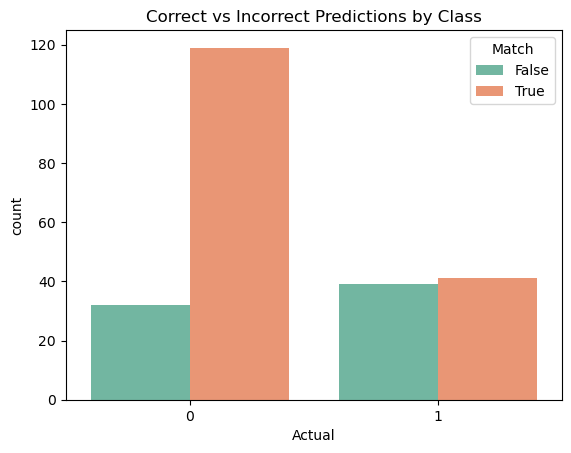

In [24]:
df_compare['Match'] = df_compare['Actual'] == df_compare['Predicted']

sns.countplot(x='Actual', hue='Match', data=df_compare, palette='Set2')
plt.title("Correct vs Incorrect Predictions by Class")
plt.show()


## Project Summary: Diabetes Prediction using KNN

**Objective:**  
Predict whether a patient has diabetes based on health metrics using K-Nearest Neighbors (KNN) classifier.

---

###  Results
- **Model:** KNeighborsClassifier  
- **Accuracy:** ~0.70 (depending on train-test split)  
- **Evaluation:**
  - Confusion Matrix used to evaluate true/false positives and negatives.
  - Classification Report provided precision, recall, F1-score.

---

###  Key Insights
- Dataset had no null values or duplicates.
- Features were scaled using `StandardScaler`.
- Visualizations helped identify data distributions and outliers.
- Model showed good baseline performance, could be improved with hyperparameter tuning and cross-validation.

---

### 📈 Real-World Application
This model could help in **early detection of diabetes**, supporting healthcare professionals by automating risk classification.

